Imports needed and data loader

In [1]:
%load_ext autoreload
%autoreload 2

import os
import itertools 
from os.path import join
from pdb import set_trace

import numpy as np
import pandas as pd
import mne
import tensorflow as tf
from IPython.display import display, clear_output

import deepbci as dbci
from deepbci.utils import utils
from deepbci.data_utils.data import run_group_mutators

from hydra.utils import instantiate

from deepbci.data_utils.data import Groups, run_group_mutators

In [2]:
def clean_config(cfg, keep_keys):
    keys = list(cfg.keys())
    [cfg.pop(k) for k in keys if k not in keep_keys]

def instantiate_and_mutate(data_cfg):
    built_data_cfg = instantiate(data_cfg, _convert_='all')

    grps = built_data_cfg.pop('groups')
    mutate = built_data_cfg.pop('mutate', None)

    if mutate is not None:
        run_group_mutators(grps, mutate)
                            
    return grps

In [3]:
data_cfg_name = 'data-load.yaml'

data_cfg_path = join('configs', data_cfg_name)
data_cfg = utils.load_yaml(data_cfg_path)

clean_config(data_cfg, keep_keys=['groups', 'mutate'])

data_cfg

{'groups': {'_target_': 'deepbci.data_utils.Groups',
  'data_groups': {'dbci': [{'_target_': 'deepbci.data_utils.data_loaders.load_data',
     'load_method': 'load_to_memory',
     'load_method_kwargs': {'subjects': [10, 11],
      'trials': [1, 2, 3, 4, 5],
      'data_file': 'eeg.csv',
      'true_fs': False,
      'preload_epoch_indexes': {'generate_sync_epochs': {'use_events': [1]}}},
     'data_loader': {'_target_': 'deepbci.data_utils.data_loaders.BGSIntLoader'}}]}},
 'mutate': [{'apply_func': {'select': None,
    'func': {'_partial_': True,
     '_target_': 'deepbci.data_utils.mutators.filter',
     'l_freq': 0.1,
     'h_freq': 30,
     'method': 'iir',
     'verbose': False,
     'iir_params': {'order': 4, 'ftype': 'butter', 'output': 'sos'}}}},
  {'apply_func': {'select': None,
    'func': {'_partial_': True,
     '_target_': 'deepbci.data_utils.mutators.epoch',
     'tmin': 0,
     'tmax': 0.995,
     'preload': True,
     'picks': ['eeg'],
     'verbose': 'WARNING',
     'b

In [4]:
#mne.set_log_level('ERROR')
grps = instantiate_and_mutate(data_cfg)

Not setting metadata
99 matching events found
No baseline correction applied
0 bad epochs dropped
Not setting metadata
102 matching events found
No baseline correction applied
0 bad epochs dropped


In [5]:
grps

group  dataset  subject  trial
dbci   BGSInt   10       NaN      DataGroup(BaseEpochs, ndarray)
                11       NaN      DataGroup(BaseEpochs, ndarray)
Name: data, dtype: object

Sperate the data into the 2 subjects and showcase methods you can use on the data groups

In [6]:
s10,s11 = grps[['dbci'],['BGSInt'],['10','11']]

In [8]:
s10.data[0]

Number of events,1
Events,1: 1
Time range,0.000 – 0.995 sec
Baseline,off


In [29]:
s11.__dict__

{'data': <Epochs |  102 events (all good), 0 - 0.995 sec, baseline off, ~650 kB, data loaded,
  '1': 102>,
 'labels': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'tags': {'dataset': {'BGSInt'}, 'subject': {11}, 'trial': {1, 2, 3, 4, 5}},
 'event_ids': {'unk': 0, 'ern': 1, 'crn': 2},
 'epochs': array([[  1226,      0,      1],
        [  2460,      0,      1],
        [  3785,      0,      1],
        [  6122,      0,      1],
        [  6451,      0,      1],
        [  7880,      0,      1],
        [  9131,      0,      1],
        [  9886,      0,      1],
        [ 10232,      0,      1],
        [ 11634,      0,      1],
        [ 13241,      0,      1],
        [ 13564,      0,    

In [34]:
s11.epochs

array([[  1226,      0,      1],
       [  2460,      0,      1],
       [  3785,      0,      1],
       [  6122,      0,      1],
       [  6451,      0,      1],
       [  7880,      0,      1],
       [  9131,      0,      1],
       [  9886,      0,      1],
       [ 10232,      0,      1],
       [ 11634,      0,      1],
       [ 13241,      0,      1],
       [ 13564,      0,      1],
       [ 16452,      0,      1],
       [ 20289,      0,      1],
       [ 22214,      0,      1],
       [ 22866,      0,      1],
       [ 25901,      0,      1],
       [ 27206,      0,      1],
       [ 32610,      0,      1],
       [ 32945,      0,      1],
       [ 34299,      0,      1],
       [ 35936,      0,      1],
       [ 40778,      0,      1],
       [ 43239,      0,      1],
       [ 45759,      0,      1],
       [ 47027,      0,      1],
       [ 49245,      0,      1],
       [ 49911,      0,      1],
       [ 50549,      0,      1],
       [ 50885,      0,      1],
       [ 5

## Generate pairs of data to be used in our model

In [41]:
import random
np.random.seed(10)
def make_pairs(subjects, num_pairs):
    # Passes in a list of subjects, and number of pairs for matching and non matching per data point
    
    # Create pairs of data [data1, data2, matching int] 0 = matching, 1 = not matching
    x = []
    y = []
    for i in range(subjects[0].epochs.shape[0]):
        # Create 50 matching pairs
        for j in range(num_pairs):
            pair = []
            pair.append(subjects[0].data[i].get_data())
            pair.append(subjects[0].data[np.random.randint(0,subjects[0].epochs.shape[0]-1)].get_data())
            x.append(np.array(pair))
            y.append(0.0)
        
        # Create 50 non matching pairs
        for k in range(num_pairs):
            pair = []
            pair.append(subjects[0].data[i].get_data())
            pair.append(subjects[1].data[np.random.randint(0,subjects[1].epochs.shape[0]-1)].get_data())
            x.append(np.array(pair))
            y.append(1.0)
        
        
    return np.array(x), np.array(y)

In [22]:
subjects=[s10,s11]
x, y = make_pairs(subjects,50)
len(x)

9900

In [10]:
x

array([[[[[-1.35276363e-06, -2.60627869e-06, -3.54827601e-06, ...,
           -5.96286295e-06, -5.92493549e-06, -5.05474499e-06],
          [-6.37422366e-07, -2.04894184e-06, -2.66026016e-06, ...,
           -9.60743777e-06, -9.04728684e-06, -6.84110632e-06],
          [-9.87904606e-07, -2.34055266e-06, -3.00180964e-06, ...,
           -8.91372921e-06, -7.27219919e-06, -2.93532656e-06],
          [ 1.94055249e-06,  1.63593425e-08, -2.60581317e-06, ...,
           -4.01795487e-06, -5.25642854e-06, -4.99876665e-06]]],


        [[[-7.05990656e-06, -7.61226648e-06, -5.08384463e-06, ...,
           -2.92827641e-08,  7.96196655e-07, -3.53712980e-07],
          [-1.07667920e-05, -1.21947049e-05, -9.50314003e-06, ...,
           -4.05493211e-06, -3.72829203e-06, -4.20680158e-06],
          [-9.85711872e-06, -1.00181082e-05, -7.19167726e-06, ...,
           -1.65601237e-06, -1.49466345e-06, -2.08753812e-06],
          [-6.69767082e-06, -9.13762387e-06, -7.83071189e-06, ...,
           -3.62262

In [11]:
y

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1.

Creating the training and test splits

In [23]:
y=y.reshape(-1,1)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   random_state=10, 
                                   test_size=0.20, 
                                   shuffle=True)

In [25]:
len(x_test)

1980

## Training the model

In [26]:
tf.config.run_functions_eagerly(True)

In [27]:
from siaNET import Siamese

siam = Siamese(chs=1, n_classes=2) # Using all channels, Num classes is 2: Matching or Non Matching

In [28]:
siam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [29]:
siam.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
(32, 1)
(32, 1)
  1/248 [..............................] - ETA: 41s - loss: 0.7111 - accuracy: 0.4688(32, 1)
(32, 1)
  2/248 [..............................] - ETA: 15s - loss: 0.7147 - accuracy: 0.4688(32, 1)
(32, 1)
  3/248 [..............................] - ETA: 16s - loss: 0.7039 - accuracy: 0.4688(32, 1)
(32, 1)
  4/248 [..............................] - ETA: 16s - loss: 0.6901 - accuracy: 0.5000(32, 1)
(32, 1)
  5/248 [..............................] - ETA: 16s - loss: 0.6799 - accuracy: 0.5250(32, 1)
(32, 1)
  6/248 [..............................] - ETA: 16s - loss: 0.6742 - accuracy: 0.5312(32, 1)
(32, 1)
  7/248 [..............................] - ETA: 16s - loss: 0.6621 - accuracy: 0.5625(32, 1)
(32, 1)
  8/248 [..............................] - ETA: 16s - loss: 0.6629 - accuracy: 0.5625(32, 1)
(32, 1)
  9/248 [>.............................] - ETA: 16s - loss: 0.6637 - accuracy: 0.5590(32, 1)
(32, 1)
 10/248 [>.............................] - ETA: 16s - loss: 0.66

 85/248 [=========>....................] - ETA: 10s - loss: 0.6664 - accuracy: 0.5055(32, 1)
(32, 1)
(32, 1)
(32, 1)
 87/248 [=========>....................] - ETA: 9s - loss: 0.6666 - accuracy: 0.5040 (32, 1)
(32, 1)
 88/248 [=========>....................] - ETA: 9s - loss: 0.6669 - accuracy: 0.5025(32, 1)
(32, 1)
(32, 1)
(32, 1)
 90/248 [=========>....................] - ETA: 9s - loss: 0.6663 - accuracy: 0.5024(32, 1)
(32, 1)
 91/248 [==========>...................] - ETA: 9s - loss: 0.6664 - accuracy: 0.5024(32, 1)
(32, 1)
 92/248 [==========>...................] - ETA: 9s - loss: 0.6665 - accuracy: 0.5020(32, 1)
(32, 1)
(32, 1)
(32, 1)
 94/248 [==========>...................] - ETA: 9s - loss: 0.6664 - accuracy: 0.5017(32, 1)
(32, 1)
(32, 1)
(32, 1)
 96/248 [==========>...................] - ETA: 9s - loss: 0.6660 - accuracy: 0.5020(32, 1)
(32, 1)
(32, 1)
(32, 1)
 98/248 [==========>...................] - ETA: 9s - loss: 0.6658 - accuracy: 0.5016(32, 1)
(32, 1)
 99/248 [=========

193/248 [======================>.......] - ETA: 3s - loss: 0.6551 - accuracy: 0.5021(32, 1)
(32, 1)
(32, 1)
(32, 1)
195/248 [======================>.......] - ETA: 3s - loss: 0.6545 - accuracy: 0.5034(32, 1)
(32, 1)
(32, 1)
(32, 1)
197/248 [======================>.......] - ETA: 2s - loss: 0.6543 - accuracy: 0.5036(32, 1)
(32, 1)
(32, 1)
(32, 1)
199/248 [=======================>......] - ETA: 2s - loss: 0.6541 - accuracy: 0.5039(32, 1)
(32, 1)
(32, 1)
(32, 1)
201/248 [=======================>......] - ETA: 2s - loss: 0.6538 - accuracy: 0.5037(32, 1)
(32, 1)
202/248 [=======================>......] - ETA: 2s - loss: 0.6536 - accuracy: 0.5036(32, 1)
(32, 1)
203/248 [=======================>......] - ETA: 2s - loss: 0.6537 - accuracy: 0.5035(32, 1)
(32, 1)
204/248 [=======================>......] - ETA: 2s - loss: 0.6538 - accuracy: 0.5035(32, 1)
(32, 1)
(32, 1)
(32, 1)
206/248 [=======================>......] - ETA: 2s - loss: 0.6539 - accuracy: 0.5030(32, 1)
(32, 1)
207/248 [===========

 49/248 [====>.........................] - ETA: 10s - loss: 0.6352 - accuracy: 0.5249(32, 1)
(32, 1)
 50/248 [=====>........................] - ETA: 10s - loss: 0.6352 - accuracy: 0.5238(32, 1)
(32, 1)
 51/248 [=====>........................] - ETA: 10s - loss: 0.6350 - accuracy: 0.5239(32, 1)
(32, 1)
 52/248 [=====>........................] - ETA: 10s - loss: 0.6345 - accuracy: 0.5246(32, 1)
(32, 1)
 53/248 [=====>........................] - ETA: 10s - loss: 0.6343 - accuracy: 0.5254(32, 1)
(32, 1)
 54/248 [=====>........................] - ETA: 10s - loss: 0.6338 - accuracy: 0.5272(32, 1)
(32, 1)
(32, 1)
(32, 1)
 56/248 [=====>........................] - ETA: 10s - loss: 0.6336 - accuracy: 0.5251(32, 1)
(32, 1)
 57/248 [=====>........................] - ETA: 10s - loss: 0.6326 - accuracy: 0.5280(32, 1)
(32, 1)
 58/248 [======>.......................] - ETA: 10s - loss: 0.6318 - accuracy: 0.5302(32, 1)
(32, 1)
 59/248 [======>.......................] - ETA: 10s - loss: 0.6320 - accura

151/248 [=================>............] - ETA: 5s - loss: 0.6257 - accuracy: 0.5286(32, 1)
(32, 1)
152/248 [=================>............] - ETA: 5s - loss: 0.6258 - accuracy: 0.5284(32, 1)
(32, 1)
(32, 1)
(32, 1)
154/248 [=================>............] - ETA: 5s - loss: 0.6259 - accuracy: 0.5282(32, 1)
(32, 1)
(32, 1)
(32, 1)
156/248 [=================>............] - ETA: 4s - loss: 0.6256 - accuracy: 0.5298(32, 1)
(32, 1)
(32, 1)
(32, 1)
158/248 [==================>...........] - ETA: 4s - loss: 0.6253 - accuracy: 0.5309(32, 1)
(32, 1)
(32, 1)
(32, 1)
160/248 [==================>...........] - ETA: 4s - loss: 0.6257 - accuracy: 0.5322(32, 1)
(32, 1)
(32, 1)
(32, 1)
162/248 [==================>...........] - ETA: 4s - loss: 0.6262 - accuracy: 0.5318(32, 1)
(32, 1)
(32, 1)
(32, 1)
164/248 [==================>...........] - ETA: 4s - loss: 0.6266 - accuracy: 0.5316(32, 1)
(32, 1)
(32, 1)
(32, 1)
166/248 [===================>..........] - ETA: 4s - loss: 0.6261 - accuracy: 0.5320(32,

 10/248 [>.............................] - ETA: 14s - loss: 0.6073 - accuracy: 0.5969(32, 1)
(32, 1)
 11/248 [>.............................] - ETA: 14s - loss: 0.6081 - accuracy: 0.5852(32, 1)
(32, 1)
 12/248 [>.............................] - ETA: 14s - loss: 0.6072 - accuracy: 0.5781(32, 1)
(32, 1)
 13/248 [>.............................] - ETA: 14s - loss: 0.6019 - accuracy: 0.5817(32, 1)
(32, 1)
 14/248 [>.............................] - ETA: 14s - loss: 0.6031 - accuracy: 0.5848(32, 1)
(32, 1)
(32, 1)
(32, 1)
 16/248 [>.............................] - ETA: 13s - loss: 0.6079 - accuracy: 0.5684(32, 1)
(32, 1)
 17/248 [=>............................] - ETA: 13s - loss: 0.6048 - accuracy: 0.5662(32, 1)
(32, 1)
 18/248 [=>............................] - ETA: 13s - loss: 0.6067 - accuracy: 0.5660(32, 1)
(32, 1)
 19/248 [=>............................] - ETA: 13s - loss: 0.6057 - accuracy: 0.5658(32, 1)
(32, 1)
(32, 1)
(32, 1)
 21/248 [=>............................] - ETA: 13s - loss:

108/248 [============>.................] - ETA: 7s - loss: 0.6136 - accuracy: 0.5833(32, 1)
(32, 1)
109/248 [============>.................] - ETA: 7s - loss: 0.6139 - accuracy: 0.5837(32, 1)
(32, 1)
110/248 [============>.................] - ETA: 7s - loss: 0.6142 - accuracy: 0.5835(32, 1)
(32, 1)
111/248 [============>.................] - ETA: 7s - loss: 0.6136 - accuracy: 0.5839(32, 1)
(32, 1)
112/248 [============>.................] - ETA: 7s - loss: 0.6132 - accuracy: 0.5859(32, 1)
(32, 1)
113/248 [============>.................] - ETA: 7s - loss: 0.6129 - accuracy: 0.5863(32, 1)
(32, 1)
114/248 [============>.................] - ETA: 7s - loss: 0.6129 - accuracy: 0.5861(32, 1)
(32, 1)
(32, 1)
(32, 1)
116/248 [=============>................] - ETA: 7s - loss: 0.6128 - accuracy: 0.5859(32, 1)
(32, 1)
117/248 [=============>................] - ETA: 7s - loss: 0.6121 - accuracy: 0.5868(32, 1)
(32, 1)
118/248 [=============>................] - ETA: 7s - loss: 0.6119 - accuracy: 0.5871

203/248 [=======================>......] - ETA: 2s - loss: 0.6091 - accuracy: 0.6048(32, 1)
(32, 1)
204/248 [=======================>......] - ETA: 2s - loss: 0.6087 - accuracy: 0.6054(32, 1)
(32, 1)
205/248 [=======================>......] - ETA: 2s - loss: 0.6091 - accuracy: 0.6047(32, 1)
(32, 1)
206/248 [=======================>......] - ETA: 2s - loss: 0.6088 - accuracy: 0.6054(32, 1)
(32, 1)
207/248 [========================>.....] - ETA: 2s - loss: 0.6086 - accuracy: 0.6060(32, 1)
(32, 1)
208/248 [========================>.....] - ETA: 2s - loss: 0.6088 - accuracy: 0.6058(32, 1)
(32, 1)
209/248 [========================>.....] - ETA: 2s - loss: 0.6089 - accuracy: 0.6053(32, 1)
(32, 1)
210/248 [========================>.....] - ETA: 2s - loss: 0.6085 - accuracy: 0.6052(32, 1)
(32, 1)
211/248 [========================>.....] - ETA: 2s - loss: 0.6084 - accuracy: 0.6046(32, 1)
(32, 1)
212/248 [========================>.....] - ETA: 2s - loss: 0.6083 - accuracy: 0.6047(32, 1)
(32, 1)


 42/248 [====>.........................] - ETA: 12s - loss: 0.5885 - accuracy: 0.6421(32, 1)
(32, 1)
 43/248 [====>.........................] - ETA: 12s - loss: 0.5895 - accuracy: 0.6403(32, 1)
(32, 1)
 44/248 [====>.........................] - ETA: 12s - loss: 0.5902 - accuracy: 0.6399(32, 1)
(32, 1)
 45/248 [====>.........................] - ETA: 12s - loss: 0.5907 - accuracy: 0.6382(32, 1)
(32, 1)
 46/248 [====>.........................] - ETA: 12s - loss: 0.5917 - accuracy: 0.6379(32, 1)
(32, 1)
(32, 1)
(32, 1)
 48/248 [====>.........................] - ETA: 12s - loss: 0.5926 - accuracy: 0.6361(32, 1)
(32, 1)
(32, 1)
(32, 1)
 50/248 [=====>........................] - ETA: 11s - loss: 0.5919 - accuracy: 0.6356(32, 1)
(32, 1)
(32, 1)
(32, 1)
 52/248 [=====>........................] - ETA: 11s - loss: 0.5923 - accuracy: 0.6364(32, 1)
(32, 1)
 53/248 [=====>........................] - ETA: 11s - loss: 0.5923 - accuracy: 0.6386(32, 1)
(32, 1)
(32, 1)
(32, 1)
 55/248 [=====>............

136/248 [===============>..............] - ETA: 6s - loss: 0.5907 - accuracy: 0.6514(32, 1)
(32, 1)
137/248 [===============>..............] - ETA: 6s - loss: 0.5912 - accuracy: 0.6515(32, 1)
(32, 1)
138/248 [===============>..............] - ETA: 6s - loss: 0.5915 - accuracy: 0.6504(32, 1)
(32, 1)
139/248 [===============>..............] - ETA: 6s - loss: 0.5913 - accuracy: 0.6502(32, 1)
(32, 1)
140/248 [===============>..............] - ETA: 6s - loss: 0.5915 - accuracy: 0.6502(32, 1)
(32, 1)
141/248 [================>.............] - ETA: 6s - loss: 0.5913 - accuracy: 0.6509(32, 1)
(32, 1)
142/248 [================>.............] - ETA: 6s - loss: 0.5916 - accuracy: 0.6507(32, 1)
(32, 1)
143/248 [================>.............] - ETA: 6s - loss: 0.5915 - accuracy: 0.6508(32, 1)
(32, 1)
144/248 [================>.............] - ETA: 5s - loss: 0.5911 - accuracy: 0.6513(32, 1)
(32, 1)
145/248 [================>.............] - ETA: 5s - loss: 0.5911 - accuracy: 0.6506(32, 1)
(32, 1)


223/248 [=========================>....] - ETA: 1s - loss: 0.5901 - accuracy: 0.6628(32, 1)
(32, 1)
(32, 1)
(32, 1)
225/248 [==========================>...] - ETA: 1s - loss: 0.5896 - accuracy: 0.6640(32, 1)
(32, 1)
226/248 [==========================>...] - ETA: 1s - loss: 0.5894 - accuracy: 0.6641(32, 1)
(32, 1)
227/248 [==========================>...] - ETA: 1s - loss: 0.5889 - accuracy: 0.6649(32, 1)
(32, 1)
228/248 [==========================>...] - ETA: 1s - loss: 0.5891 - accuracy: 0.6649(32, 1)
(32, 1)
(32, 1)
(32, 1)
230/248 [==========================>...] - ETA: 1s - loss: 0.5891 - accuracy: 0.6644(32, 1)
(32, 1)
231/248 [==========================>...] - ETA: 0s - loss: 0.5890 - accuracy: 0.6648(32, 1)
(32, 1)
232/248 [===========================>..] - ETA: 0s - loss: 0.5890 - accuracy: 0.6639(32, 1)
(32, 1)
233/248 [===========================>..] - ETA: 0s - loss: 0.5889 - accuracy: 0.6646(32, 1)
(32, 1)
234/248 [===========================>..] - ETA: 0s - loss: 0.5892 - 

 61/248 [======>.......................] - ETA: 11s - loss: 0.5810 - accuracy: 0.6849(32, 1)
(32, 1)
 62/248 [======>.......................] - ETA: 11s - loss: 0.5802 - accuracy: 0.6865(32, 1)
(32, 1)
 63/248 [======>.......................] - ETA: 11s - loss: 0.5802 - accuracy: 0.6880(32, 1)
(32, 1)
 64/248 [======>.......................] - ETA: 11s - loss: 0.5803 - accuracy: 0.6890(32, 1)
(32, 1)
 65/248 [======>.......................] - ETA: 11s - loss: 0.5795 - accuracy: 0.6899(32, 1)
(32, 1)
 66/248 [======>.......................] - ETA: 11s - loss: 0.5803 - accuracy: 0.6889(32, 1)
(32, 1)
 67/248 [=======>......................] - ETA: 11s - loss: 0.5804 - accuracy: 0.6903(32, 1)
(32, 1)
 68/248 [=======>......................] - ETA: 11s - loss: 0.5800 - accuracy: 0.6903(32, 1)
(32, 1)
 69/248 [=======>......................] - ETA: 11s - loss: 0.5798 - accuracy: 0.6898(32, 1)
(32, 1)
 70/248 [=======>......................] - ETA: 11s - loss: 0.5793 - accuracy: 0.6915(32, 1

142/248 [================>.............] - ETA: 6s - loss: 0.5787 - accuracy: 0.6934(32, 1)
(32, 1)
143/248 [================>.............] - ETA: 6s - loss: 0.5785 - accuracy: 0.6934(32, 1)
(32, 1)
144/248 [================>.............] - ETA: 6s - loss: 0.5784 - accuracy: 0.6938(32, 1)
(32, 1)
145/248 [================>.............] - ETA: 6s - loss: 0.5784 - accuracy: 0.6942(32, 1)
(32, 1)
146/248 [================>.............] - ETA: 6s - loss: 0.5782 - accuracy: 0.6943(32, 1)
(32, 1)
147/248 [================>.............] - ETA: 6s - loss: 0.5781 - accuracy: 0.6943(32, 1)
(32, 1)
148/248 [================>.............] - ETA: 6s - loss: 0.5779 - accuracy: 0.6949(32, 1)
(32, 1)
149/248 [=================>............] - ETA: 6s - loss: 0.5777 - accuracy: 0.6957(32, 1)
(32, 1)
150/248 [=================>............] - ETA: 6s - loss: 0.5777 - accuracy: 0.6958(32, 1)
(32, 1)
151/248 [=================>............] - ETA: 6s - loss: 0.5779 - accuracy: 0.6952(32, 1)
(32, 1)


224/248 [==========================>...] - ETA: 1s - loss: 0.5770 - accuracy: 0.6938(32, 1)
(32, 1)
225/248 [==========================>...] - ETA: 1s - loss: 0.5767 - accuracy: 0.6944(32, 1)
(32, 1)
226/248 [==========================>...] - ETA: 1s - loss: 0.5767 - accuracy: 0.6948(32, 1)
(32, 1)
227/248 [==========================>...] - ETA: 1s - loss: 0.5769 - accuracy: 0.6951(32, 1)
(32, 1)
228/248 [==========================>...] - ETA: 1s - loss: 0.5768 - accuracy: 0.6953(32, 1)
(32, 1)
229/248 [==========================>...] - ETA: 1s - loss: 0.5766 - accuracy: 0.6957(32, 1)
(32, 1)
230/248 [==========================>...] - ETA: 1s - loss: 0.5770 - accuracy: 0.6951(32, 1)
(32, 1)
231/248 [==========================>...] - ETA: 1s - loss: 0.5768 - accuracy: 0.6955(32, 1)
(32, 1)
232/248 [===========================>..] - ETA: 1s - loss: 0.5767 - accuracy: 0.6961(32, 1)
(32, 1)
233/248 [===========================>..] - ETA: 1s - loss: 0.5769 - accuracy: 0.6959(32, 1)
(32, 1)


 57/248 [=====>........................] - ETA: 13s - loss: 0.5717 - accuracy: 0.7023(32, 1)
(32, 1)
 58/248 [======>.......................] - ETA: 13s - loss: 0.5722 - accuracy: 0.7015(32, 1)
(32, 1)
 59/248 [======>.......................] - ETA: 13s - loss: 0.5718 - accuracy: 0.7007(32, 1)
(32, 1)
 60/248 [======>.......................] - ETA: 13s - loss: 0.5708 - accuracy: 0.7010(32, 1)
(32, 1)
 61/248 [======>.......................] - ETA: 13s - loss: 0.5711 - accuracy: 0.7013(32, 1)
(32, 1)
 62/248 [======>.......................] - ETA: 13s - loss: 0.5714 - accuracy: 0.7011(32, 1)
(32, 1)
 63/248 [======>.......................] - ETA: 13s - loss: 0.5721 - accuracy: 0.6994(32, 1)
(32, 1)
 64/248 [======>.......................] - ETA: 13s - loss: 0.5712 - accuracy: 0.6992(32, 1)
(32, 1)
 65/248 [======>.......................] - ETA: 13s - loss: 0.5719 - accuracy: 0.6990(32, 1)
(32, 1)
 66/248 [======>.......................] - ETA: 12s - loss: 0.5731 - accuracy: 0.6960(32, 1

138/248 [===============>..............] - ETA: 7s - loss: 0.5741 - accuracy: 0.7029(32, 1)
(32, 1)
139/248 [===============>..............] - ETA: 7s - loss: 0.5736 - accuracy: 0.7035(32, 1)
(32, 1)
140/248 [===============>..............] - ETA: 7s - loss: 0.5735 - accuracy: 0.7036(32, 1)
(32, 1)
141/248 [================>.............] - ETA: 7s - loss: 0.5737 - accuracy: 0.7030(32, 1)
(32, 1)
142/248 [================>.............] - ETA: 7s - loss: 0.5743 - accuracy: 0.7025(32, 1)
(32, 1)
143/248 [================>.............] - ETA: 7s - loss: 0.5738 - accuracy: 0.7032(32, 1)
(32, 1)
144/248 [================>.............] - ETA: 7s - loss: 0.5738 - accuracy: 0.7031(32, 1)
(32, 1)
145/248 [================>.............] - ETA: 7s - loss: 0.5747 - accuracy: 0.7024(32, 1)
(32, 1)
146/248 [================>.............] - ETA: 7s - loss: 0.5740 - accuracy: 0.7033(32, 1)
(32, 1)
147/248 [================>.............] - ETA: 7s - loss: 0.5739 - accuracy: 0.7039(32, 1)
(32, 1)


220/248 [=========================>....] - ETA: 2s - loss: 0.5654 - accuracy: 0.7095(32, 1)
(32, 1)
221/248 [=========================>....] - ETA: 1s - loss: 0.5654 - accuracy: 0.7094(32, 1)
(32, 1)
222/248 [=========================>....] - ETA: 1s - loss: 0.5654 - accuracy: 0.7100(32, 1)
(32, 1)
223/248 [=========================>....] - ETA: 1s - loss: 0.5656 - accuracy: 0.7092(32, 1)
(32, 1)
224/248 [==========================>...] - ETA: 1s - loss: 0.5656 - accuracy: 0.7093(32, 1)
(32, 1)
225/248 [==========================>...] - ETA: 1s - loss: 0.5655 - accuracy: 0.7093(32, 1)
(32, 1)
226/248 [==========================>...] - ETA: 1s - loss: 0.5654 - accuracy: 0.7095(32, 1)
(32, 1)
227/248 [==========================>...] - ETA: 1s - loss: 0.5654 - accuracy: 0.7097(32, 1)
(32, 1)
228/248 [==========================>...] - ETA: 1s - loss: 0.5655 - accuracy: 0.7100(32, 1)
(32, 1)
229/248 [==========================>...] - ETA: 1s - loss: 0.5652 - accuracy: 0.7107(32, 1)
(32, 1)


 53/248 [=====>........................] - ETA: 14s - loss: 0.5607 - accuracy: 0.7052(32, 1)
(32, 1)
 54/248 [=====>........................] - ETA: 14s - loss: 0.5605 - accuracy: 0.7072(32, 1)
(32, 1)
 55/248 [=====>........................] - ETA: 14s - loss: 0.5590 - accuracy: 0.7091(32, 1)
(32, 1)
 56/248 [=====>........................] - ETA: 14s - loss: 0.5595 - accuracy: 0.7109(32, 1)
(32, 1)
 57/248 [=====>........................] - ETA: 13s - loss: 0.5594 - accuracy: 0.7122(32, 1)
(32, 1)
 58/248 [======>.......................] - ETA: 13s - loss: 0.5592 - accuracy: 0.7117(32, 1)
(32, 1)
 59/248 [======>.......................] - ETA: 13s - loss: 0.5605 - accuracy: 0.7092(32, 1)
(32, 1)
 60/248 [======>.......................] - ETA: 13s - loss: 0.5620 - accuracy: 0.7083(32, 1)
(32, 1)
 61/248 [======>.......................] - ETA: 13s - loss: 0.5619 - accuracy: 0.7075(32, 1)
(32, 1)
 62/248 [======>.......................] - ETA: 13s - loss: 0.5628 - accuracy: 0.7067(32, 1

134/248 [===============>..............] - ETA: 8s - loss: 0.5603 - accuracy: 0.7099(32, 1)
(32, 1)
135/248 [===============>..............] - ETA: 8s - loss: 0.5604 - accuracy: 0.7090(32, 1)
(32, 1)
136/248 [===============>..............] - ETA: 8s - loss: 0.5603 - accuracy: 0.7093(32, 1)
(32, 1)
137/248 [===============>..............] - ETA: 7s - loss: 0.5599 - accuracy: 0.7096(32, 1)
(32, 1)
138/248 [===============>..............] - ETA: 7s - loss: 0.5593 - accuracy: 0.7101(32, 1)
(32, 1)
139/248 [===============>..............] - ETA: 7s - loss: 0.5591 - accuracy: 0.7104(32, 1)
(32, 1)
140/248 [===============>..............] - ETA: 7s - loss: 0.5590 - accuracy: 0.7112(32, 1)
(32, 1)
141/248 [================>.............] - ETA: 7s - loss: 0.5590 - accuracy: 0.7114(32, 1)
(32, 1)
142/248 [================>.............] - ETA: 7s - loss: 0.5591 - accuracy: 0.7115(32, 1)
(32, 1)
143/248 [================>.............] - ETA: 7s - loss: 0.5593 - accuracy: 0.7111(32, 1)
(32, 1)


216/248 [=========================>....] - ETA: 2s - loss: 0.5605 - accuracy: 0.7109(32, 1)
(32, 1)
217/248 [=========================>....] - ETA: 2s - loss: 0.5604 - accuracy: 0.7113(32, 1)
(32, 1)
218/248 [=========================>....] - ETA: 2s - loss: 0.5605 - accuracy: 0.7113(32, 1)
(32, 1)
219/248 [=========================>....] - ETA: 2s - loss: 0.5604 - accuracy: 0.7119(32, 1)
(32, 1)
220/248 [=========================>....] - ETA: 2s - loss: 0.5606 - accuracy: 0.7121(32, 1)
(32, 1)
221/248 [=========================>....] - ETA: 1s - loss: 0.5608 - accuracy: 0.7117(32, 1)
(32, 1)
222/248 [=========================>....] - ETA: 1s - loss: 0.5611 - accuracy: 0.7110(32, 1)
(32, 1)
223/248 [=========================>....] - ETA: 1s - loss: 0.5611 - accuracy: 0.7115(32, 1)
(32, 1)
224/248 [==========================>...] - ETA: 1s - loss: 0.5609 - accuracy: 0.7121(32, 1)
(32, 1)
225/248 [==========================>...] - ETA: 1s - loss: 0.5611 - accuracy: 0.7115(32, 1)
(32, 1)


 49/248 [====>.........................] - ETA: 12s - loss: 0.5606 - accuracy: 0.7239(32, 1)
(32, 1)
 50/248 [=====>........................] - ETA: 12s - loss: 0.5600 - accuracy: 0.7237(32, 1)
(32, 1)
 51/248 [=====>........................] - ETA: 12s - loss: 0.5610 - accuracy: 0.7212(32, 1)
(32, 1)
 52/248 [=====>........................] - ETA: 12s - loss: 0.5598 - accuracy: 0.7242(32, 1)
(32, 1)
 53/248 [=====>........................] - ETA: 12s - loss: 0.5591 - accuracy: 0.7258(32, 1)
(32, 1)
 54/248 [=====>........................] - ETA: 12s - loss: 0.5575 - accuracy: 0.7292(32, 1)
(32, 1)
 55/248 [=====>........................] - ETA: 12s - loss: 0.5595 - accuracy: 0.7261(32, 1)
(32, 1)
 56/248 [=====>........................] - ETA: 12s - loss: 0.5598 - accuracy: 0.7260(32, 1)
(32, 1)
 57/248 [=====>........................] - ETA: 12s - loss: 0.5593 - accuracy: 0.7270(32, 1)
(32, 1)
 58/248 [======>.......................] - ETA: 12s - loss: 0.5581 - accuracy: 0.7290(32, 1

130/248 [==============>...............] - ETA: 7s - loss: 0.5556 - accuracy: 0.7238(32, 1)
(32, 1)
131/248 [==============>...............] - ETA: 7s - loss: 0.5549 - accuracy: 0.7245(32, 1)
(32, 1)
132/248 [==============>...............] - ETA: 7s - loss: 0.5547 - accuracy: 0.7251(32, 1)
(32, 1)
133/248 [===============>..............] - ETA: 7s - loss: 0.5549 - accuracy: 0.7249(32, 1)
(32, 1)
134/248 [===============>..............] - ETA: 7s - loss: 0.5555 - accuracy: 0.7241(32, 1)
(32, 1)
135/248 [===============>..............] - ETA: 7s - loss: 0.5558 - accuracy: 0.7234(32, 1)
(32, 1)
136/248 [===============>..............] - ETA: 7s - loss: 0.5558 - accuracy: 0.7238(32, 1)
(32, 1)
137/248 [===============>..............] - ETA: 7s - loss: 0.5559 - accuracy: 0.7229(32, 1)
(32, 1)
138/248 [===============>..............] - ETA: 6s - loss: 0.5560 - accuracy: 0.7226(32, 1)
(32, 1)
139/248 [===============>..............] - ETA: 6s - loss: 0.5559 - accuracy: 0.7228(32, 1)
(32, 1)


212/248 [========================>.....] - ETA: 2s - loss: 0.5534 - accuracy: 0.7210(32, 1)
(32, 1)
213/248 [========================>.....] - ETA: 2s - loss: 0.5533 - accuracy: 0.7210(32, 1)
(32, 1)
214/248 [========================>.....] - ETA: 2s - loss: 0.5533 - accuracy: 0.7211(32, 1)
(32, 1)
215/248 [=========================>....] - ETA: 2s - loss: 0.5531 - accuracy: 0.7217(32, 1)
(32, 1)
216/248 [=========================>....] - ETA: 2s - loss: 0.5530 - accuracy: 0.7221(32, 1)
(32, 1)
217/248 [=========================>....] - ETA: 1s - loss: 0.5529 - accuracy: 0.7228(32, 1)
(32, 1)
218/248 [=========================>....] - ETA: 1s - loss: 0.5524 - accuracy: 0.7236(32, 1)
(32, 1)
219/248 [=========================>....] - ETA: 1s - loss: 0.5524 - accuracy: 0.7237(32, 1)
(32, 1)
220/248 [=========================>....] - ETA: 1s - loss: 0.5525 - accuracy: 0.7237(32, 1)
(32, 1)
221/248 [=========================>....] - ETA: 1s - loss: 0.5524 - accuracy: 0.7241(32, 1)
(32, 1)


 45/248 [====>.........................] - ETA: 13s - loss: 0.5413 - accuracy: 0.7347(32, 1)
(32, 1)
 46/248 [====>.........................] - ETA: 13s - loss: 0.5419 - accuracy: 0.7344(32, 1)
(32, 1)
 47/248 [====>.........................] - ETA: 13s - loss: 0.5430 - accuracy: 0.7347(32, 1)
(32, 1)
 48/248 [====>.........................] - ETA: 12s - loss: 0.5436 - accuracy: 0.7344(32, 1)
(32, 1)
 49/248 [====>.........................] - ETA: 12s - loss: 0.5425 - accuracy: 0.7353(32, 1)
(32, 1)
 50/248 [=====>........................] - ETA: 12s - loss: 0.5421 - accuracy: 0.7356(32, 1)
(32, 1)
 51/248 [=====>........................] - ETA: 12s - loss: 0.5423 - accuracy: 0.7359(32, 1)
(32, 1)
 52/248 [=====>........................] - ETA: 12s - loss: 0.5433 - accuracy: 0.7362(32, 1)
(32, 1)
 53/248 [=====>........................] - ETA: 12s - loss: 0.5432 - accuracy: 0.7370(32, 1)
(32, 1)
 54/248 [=====>........................] - ETA: 12s - loss: 0.5442 - accuracy: 0.7373(32, 1

126/248 [==============>...............] - ETA: 8s - loss: 0.5436 - accuracy: 0.7349(32, 1)
(32, 1)
127/248 [==============>...............] - ETA: 8s - loss: 0.5436 - accuracy: 0.7352(32, 1)
(32, 1)
128/248 [==============>...............] - ETA: 8s - loss: 0.5444 - accuracy: 0.7336(32, 1)
(32, 1)
129/248 [==============>...............] - ETA: 8s - loss: 0.5440 - accuracy: 0.7345(32, 1)
(32, 1)
130/248 [==============>...............] - ETA: 8s - loss: 0.5433 - accuracy: 0.7356(32, 1)
(32, 1)
131/248 [==============>...............] - ETA: 8s - loss: 0.5432 - accuracy: 0.7357(32, 1)
(32, 1)
132/248 [==============>...............] - ETA: 8s - loss: 0.5438 - accuracy: 0.7346(32, 1)
(32, 1)
133/248 [===============>..............] - ETA: 7s - loss: 0.5445 - accuracy: 0.7336(32, 1)
(32, 1)
134/248 [===============>..............] - ETA: 7s - loss: 0.5445 - accuracy: 0.7334(32, 1)
(32, 1)
135/248 [===============>..............] - ETA: 7s - loss: 0.5443 - accuracy: 0.7336(32, 1)
(32, 1)


209/248 [========================>.....] - ETA: 2s - loss: 0.5421 - accuracy: 0.7383(32, 1)
(32, 1)
210/248 [========================>.....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7384(32, 1)
(32, 1)
211/248 [========================>.....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7382(32, 1)
(32, 1)
212/248 [========================>.....] - ETA: 2s - loss: 0.5416 - accuracy: 0.7386(32, 1)
(32, 1)
213/248 [========================>.....] - ETA: 2s - loss: 0.5415 - accuracy: 0.7388(32, 1)
(32, 1)
214/248 [========================>.....] - ETA: 2s - loss: 0.5418 - accuracy: 0.7385(32, 1)
(32, 1)
215/248 [=========================>....] - ETA: 2s - loss: 0.5418 - accuracy: 0.7385(32, 1)
(32, 1)
216/248 [=========================>....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7383(32, 1)
(32, 1)
217/248 [=========================>....] - ETA: 2s - loss: 0.5422 - accuracy: 0.7376(32, 1)
(32, 1)
218/248 [=========================>....] - ETA: 2s - loss: 0.5419 - accuracy: 0.7380(32, 1)
(32, 1)


 43/248 [====>.........................] - ETA: 12s - loss: 0.5433 - accuracy: 0.7260(32, 1)
(32, 1)
 44/248 [====>.........................] - ETA: 12s - loss: 0.5414 - accuracy: 0.7273(32, 1)
(32, 1)
 45/248 [====>.........................] - ETA: 12s - loss: 0.5399 - accuracy: 0.7292(32, 1)
(32, 1)
 46/248 [====>.........................] - ETA: 12s - loss: 0.5388 - accuracy: 0.7323(32, 1)
(32, 1)
 47/248 [====>.........................] - ETA: 12s - loss: 0.5383 - accuracy: 0.7334(32, 1)
(32, 1)
 48/248 [====>.........................] - ETA: 12s - loss: 0.5398 - accuracy: 0.7311(32, 1)
(32, 1)
 49/248 [====>.........................] - ETA: 12s - loss: 0.5407 - accuracy: 0.7302(32, 1)
(32, 1)
 50/248 [=====>........................] - ETA: 12s - loss: 0.5406 - accuracy: 0.7294(32, 1)
(32, 1)
 51/248 [=====>........................] - ETA: 11s - loss: 0.5391 - accuracy: 0.7304(32, 1)
(32, 1)
 52/248 [=====>........................] - ETA: 11s - loss: 0.5388 - accuracy: 0.7320(32, 1

124/248 [==============>...............] - ETA: 7s - loss: 0.5398 - accuracy: 0.7308(32, 1)
(32, 1)
125/248 [==============>...............] - ETA: 7s - loss: 0.5391 - accuracy: 0.7320(32, 1)
(32, 1)
126/248 [==============>...............] - ETA: 7s - loss: 0.5393 - accuracy: 0.7314(32, 1)
(32, 1)
127/248 [==============>...............] - ETA: 7s - loss: 0.5392 - accuracy: 0.7313(32, 1)
(32, 1)
128/248 [==============>...............] - ETA: 7s - loss: 0.5392 - accuracy: 0.7310(32, 1)
(32, 1)
129/248 [==============>...............] - ETA: 7s - loss: 0.5390 - accuracy: 0.7318(32, 1)
(32, 1)
130/248 [==============>...............] - ETA: 7s - loss: 0.5391 - accuracy: 0.7320(32, 1)
(32, 1)
131/248 [==============>...............] - ETA: 7s - loss: 0.5383 - accuracy: 0.7326(32, 1)
(32, 1)
132/248 [==============>...............] - ETA: 7s - loss: 0.5383 - accuracy: 0.7327(32, 1)
(32, 1)
133/248 [===============>..............] - ETA: 7s - loss: 0.5388 - accuracy: 0.7319(32, 1)
(32, 1)


206/248 [=======================>......] - ETA: 2s - loss: 0.5351 - accuracy: 0.7382(32, 1)
(32, 1)
207/248 [========================>.....] - ETA: 2s - loss: 0.5351 - accuracy: 0.7387(32, 1)
(32, 1)
208/248 [========================>.....] - ETA: 2s - loss: 0.5349 - accuracy: 0.7390(32, 1)
(32, 1)
209/248 [========================>.....] - ETA: 2s - loss: 0.5351 - accuracy: 0.7391(32, 1)
(32, 1)
210/248 [========================>.....] - ETA: 2s - loss: 0.5350 - accuracy: 0.7390(32, 1)
(32, 1)
211/248 [========================>.....] - ETA: 2s - loss: 0.5345 - accuracy: 0.7396(32, 1)
(32, 1)
212/248 [========================>.....] - ETA: 2s - loss: 0.5345 - accuracy: 0.7398(32, 1)
(32, 1)
213/248 [========================>.....] - ETA: 2s - loss: 0.5343 - accuracy: 0.7399(32, 1)
(32, 1)
214/248 [========================>.....] - ETA: 2s - loss: 0.5347 - accuracy: 0.7395(32, 1)
(32, 1)
215/248 [=========================>....] - ETA: 2s - loss: 0.5353 - accuracy: 0.7387(32, 1)
(32, 1)


## Testing the model and looking at results

In [32]:
# Predict with the x test set
preds = siam.predict(x_test, verbose=0)

/home/dev/miniconda/envs/mlenv/lib/python3.8/site-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(28, 1)
(28, 1)


In [34]:
preds

array([[0.65412676],
       [0.29897538],
       [0.35265118],
       ...,
       [0.4736829 ],
       [0.24004377],
       [0.3855253 ]], dtype=float32)

Confusion Matrix

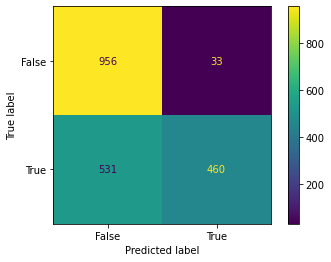

In [37]:

import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

# Threshold the predictions so theyre either 0 or 1
thresholded_preds = []
for pred in preds:
    if pred <= 0.5: 
        thresholded_preds.append(0)
    else:
        thresholded_preds.append(1)

confusion_matrix = metrics.confusion_matrix(y_test, thresholded_preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy based off amount of pairs

In [48]:
num_pairs = [1, 5, 25, 50, 75, 100, 200, 400]
accuracies = []
len_test = []
for num in num_pairs:
    x, y = make_pairs(subjects,num)
    y = y.reshape(-1,1)
    '''    
    # Dont need to split as were not traing just evaluating
    # Could make faster by splicing the largest num_pairs 
    x_train, x_test, y_train, y_test = train_test_split(x,y,
                                       random_state=10, 
                                       test_size=0.20, 
                                       shuffle=True)
    '''
    len_test.append(len(x))
    loss, accuracy = siam.evaluate(x=x, y=y)
    accuracies.append(accuracy)


(32, 1)
(32, 1)
1/7 [===>..........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.6875(32, 1)
(32, 1)
(32, 1)
(32, 1)
3/7 [===========>..................] - ETA: 0s - loss: 0.5255 - accuracy: 0.7500(32, 1)
(32, 1)
(32, 1)
(32, 1)
5/7 [====================>.........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7375(32, 1)
(32, 1)
(6, 1)
(6, 1)
7/7 [==============================] - 0s 28ms/step - loss: 0.5598 - accuracy: 0.7071
(32, 1)
(32, 1)
 1/31 [..............................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7188(32, 1)
(32, 1)
(32, 1)
(32, 1)
 3/31 [=>............................] - ETA: 1s - loss: 0.5575 - accuracy: 0.7292(32, 1)
(32, 1)
(32, 1)
(32, 1)
 5/31 [===>..........................] - ETA: 0s - loss: 0.5421 - accuracy: 0.7437(32, 1)
(32, 1)
(32, 1)
(32, 1)
 7/31 [=====>........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7634(32, 1)
(32, 1)
(32, 1)
(32, 1)
 9/31 [=======>......................] - ETA: 0s - loss: 0.5368 - accuracy: 0.7535(32, 1)
(3

103/155 [==================>...........] - ETA: 1s - loss: 0.5449 - accuracy: 0.7242(32, 1)
(32, 1)
(32, 1)
(32, 1)
105/155 [===================>..........] - ETA: 1s - loss: 0.5447 - accuracy: 0.7244(32, 1)
(32, 1)
(32, 1)
(32, 1)
107/155 [===================>..........] - ETA: 1s - loss: 0.5437 - accuracy: 0.7252(32, 1)
(32, 1)
(32, 1)
(32, 1)
109/155 [====================>.........] - ETA: 1s - loss: 0.5476 - accuracy: 0.7173(32, 1)
(32, 1)
(32, 1)
(32, 1)
111/155 [====================>.........] - ETA: 1s - loss: 0.5473 - accuracy: 0.7171(32, 1)
(32, 1)
(32, 1)
(32, 1)
113/155 [====================>.........] - ETA: 1s - loss: 0.5473 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
115/155 [=====================>........] - ETA: 1s - loss: 0.5462 - accuracy: 0.7193(32, 1)
(32, 1)
(32, 1)
(32, 1)
117/155 [=====================>........] - ETA: 1s - loss: 0.5470 - accuracy: 0.7179(32, 1)
(32, 1)
(32, 1)
(32, 1)
119/155 [======================>.......] - ETA: 1s - loss: 0.5467 - accu

(32, 1)
(32, 1)
 93/310 [========>.....................] - ETA: 6s - loss: 0.5463 - accuracy: 0.7177(32, 1)
(32, 1)
(32, 1)
(32, 1)
 95/310 [========>.....................] - ETA: 6s - loss: 0.5443 - accuracy: 0.7204(32, 1)
(32, 1)
(32, 1)
(32, 1)
 97/310 [========>.....................] - ETA: 6s - loss: 0.5464 - accuracy: 0.7168(32, 1)
(32, 1)
(32, 1)
(32, 1)
 99/310 [========>.....................] - ETA: 6s - loss: 0.5448 - accuracy: 0.7191(32, 1)
(32, 1)
(32, 1)
(32, 1)
101/310 [========>.....................] - ETA: 6s - loss: 0.5433 - accuracy: 0.7200(32, 1)
(32, 1)
(32, 1)
(32, 1)
103/310 [========>.....................] - ETA: 6s - loss: 0.5443 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
105/310 [=========>....................] - ETA: 5s - loss: 0.5430 - accuracy: 0.7211(32, 1)
(32, 1)
(32, 1)
(32, 1)
107/310 [=========>....................] - ETA: 5s - loss: 0.5449 - accuracy: 0.7188(32, 1)
(32, 1)
(32, 1)
(32, 1)
109/310 [=========>....................] - ETA: 5s - los

234/310 [=====================>........] - ETA: 2s - loss: 0.5553 - accuracy: 0.7070(32, 1)
(32, 1)
(32, 1)
(32, 1)
236/310 [=====================>........] - ETA: 2s - loss: 0.5545 - accuracy: 0.7083(32, 1)
(32, 1)
(32, 1)
(32, 1)
238/310 [======================>.......] - ETA: 2s - loss: 0.5555 - accuracy: 0.7069(32, 1)
(32, 1)
(32, 1)
(32, 1)
240/310 [======================>.......] - ETA: 2s - loss: 0.5555 - accuracy: 0.7070(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
243/310 [======================>.......] - ETA: 1s - loss: 0.5553 - accuracy: 0.7070(32, 1)
(32, 1)
(32, 1)
(32, 1)
245/310 [======================>.......] - ETA: 1s - loss: 0.5557 - accuracy: 0.7074(32, 1)
(32, 1)
(32, 1)
(32, 1)
247/310 [======================>.......] - ETA: 1s - loss: 0.5563 - accuracy: 0.7069(32, 1)
(32, 1)
(32, 1)
(32, 1)
249/310 [=======================>......] - ETA: 1s - loss: 0.5557 - accuracy: 0.7076(32, 1)
(32, 1)
(32, 1)
(32, 1)
251/310 [=======================>......] - ETA: 1s - los

(32, 1)
(32, 1)
 73/465 [===>..........................] - ETA: 10s - loss: 0.5356 - accuracy: 0.7277(32, 1)
(32, 1)
(32, 1)
(32, 1)
 75/465 [===>..........................] - ETA: 10s - loss: 0.5397 - accuracy: 0.7217(32, 1)
(32, 1)
(32, 1)
(32, 1)
 77/465 [===>..........................] - ETA: 10s - loss: 0.5364 - accuracy: 0.7281(32, 1)
(32, 1)
(32, 1)
(32, 1)
 79/465 [====>.........................] - ETA: 10s - loss: 0.5411 - accuracy: 0.7203(32, 1)
(32, 1)
(32, 1)
(32, 1)
 81/465 [====>.........................] - ETA: 10s - loss: 0.5406 - accuracy: 0.7211(32, 1)
(32, 1)
(32, 1)
(32, 1)
 83/465 [====>.........................] - ETA: 10s - loss: 0.5416 - accuracy: 0.7199(32, 1)
(32, 1)
(32, 1)
(32, 1)
 85/465 [====>.........................] - ETA: 10s - loss: 0.5427 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
 87/465 [====>.........................] - ETA: 10s - loss: 0.5393 - accuracy: 0.7216(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 90/465 [====>..................

217/465 [=============>................] - ETA: 6s - loss: 0.5530 - accuracy: 0.7130(32, 1)
(32, 1)
(32, 1)
(32, 1)
219/465 [=============>................] - ETA: 6s - loss: 0.5529 - accuracy: 0.7129(32, 1)
(32, 1)
(32, 1)
(32, 1)
221/465 [=============>................] - ETA: 6s - loss: 0.5540 - accuracy: 0.7115(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
224/465 [=============>................] - ETA: 6s - loss: 0.5533 - accuracy: 0.7121(32, 1)
(32, 1)
(32, 1)
(32, 1)
226/465 [=============>................] - ETA: 6s - loss: 0.5527 - accuracy: 0.7128(32, 1)
(32, 1)
(32, 1)
(32, 1)
228/465 [=============>................] - ETA: 6s - loss: 0.5523 - accuracy: 0.7133(32, 1)
(32, 1)
(32, 1)
(32, 1)
230/465 [=============>................] - ETA: 6s - loss: 0.5536 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
232/465 [=============>................] - ETA: 6s - loss: 0.5517 - accuracy: 0.7139(32, 1)
(32, 1)
(32, 1)
(32, 1)
234/465 [==============>...............] - ETA: 6s - los

366/465 [======================>.......] - ETA: 2s - loss: 0.5557 - accuracy: 0.7079(32, 1)
(32, 1)
(32, 1)
(32, 1)
368/465 [======================>.......] - ETA: 2s - loss: 0.5553 - accuracy: 0.7091(32, 1)
(32, 1)
(32, 1)
(32, 1)
370/465 [======================>.......] - ETA: 2s - loss: 0.5555 - accuracy: 0.7083(32, 1)
(32, 1)
(32, 1)
(32, 1)
372/465 [=======================>......] - ETA: 2s - loss: 0.5548 - accuracy: 0.7092(32, 1)
(32, 1)
(32, 1)
(32, 1)
374/465 [=======================>......] - ETA: 2s - loss: 0.5556 - accuracy: 0.7082(32, 1)
(32, 1)
(32, 1)
(32, 1)
376/465 [=======================>......] - ETA: 2s - loss: 0.5559 - accuracy: 0.7079(32, 1)
(32, 1)
(32, 1)
(32, 1)
378/465 [=======================>......] - ETA: 2s - loss: 0.5555 - accuracy: 0.7083(32, 1)
(32, 1)
(32, 1)
(32, 1)
380/465 [=======================>......] - ETA: 2s - loss: 0.5561 - accuracy: 0.7073(32, 1)
(32, 1)
(32, 1)
(32, 1)
382/465 [=======================>......] - ETA: 2s - loss: 0.5551 - accu

 44/619 [=>............................] - ETA: 20s - loss: 0.5474 - accuracy: 0.7116(32, 1)
(32, 1)
(32, 1)
(32, 1)
 46/619 [=>............................] - ETA: 20s - loss: 0.5400 - accuracy: 0.7235(32, 1)
(32, 1)
(32, 1)
(32, 1)
 48/619 [=>............................] - ETA: 19s - loss: 0.5451 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
 50/619 [=>............................] - ETA: 19s - loss: 0.5529 - accuracy: 0.7050(32, 1)
(32, 1)
(32, 1)
(32, 1)
 52/619 [=>............................] - ETA: 19s - loss: 0.5452 - accuracy: 0.7157(32, 1)
(32, 1)
(32, 1)
(32, 1)
 54/619 [=>............................] - ETA: 19s - loss: 0.5450 - accuracy: 0.7164(32, 1)
(32, 1)
(32, 1)
(32, 1)
 56/619 [=>............................] - ETA: 19s - loss: 0.5507 - accuracy: 0.7065(32, 1)
(32, 1)
(32, 1)
(32, 1)
 58/619 [=>............................] - ETA: 19s - loss: 0.5490 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
 60/619 [=>............................] - ETA: 19s - loss: 0.54

186/619 [========>.....................] - ETA: 13s - loss: 0.5503 - accuracy: 0.7140(32, 1)
(32, 1)
(32, 1)
(32, 1)
188/619 [========>.....................] - ETA: 13s - loss: 0.5521 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
190/619 [========>.....................] - ETA: 13s - loss: 0.5500 - accuracy: 0.7145(32, 1)
(32, 1)
(32, 1)
(32, 1)
192/619 [========>.....................] - ETA: 13s - loss: 0.5514 - accuracy: 0.7127(32, 1)
(32, 1)
(32, 1)
(32, 1)
194/619 [========>.....................] - ETA: 13s - loss: 0.5529 - accuracy: 0.7107(32, 1)
(32, 1)
(32, 1)
(32, 1)
196/619 [========>.....................] - ETA: 13s - loss: 0.5506 - accuracy: 0.7136(32, 1)
(32, 1)
(32, 1)
(32, 1)
198/619 [========>.....................] - ETA: 13s - loss: 0.5505 - accuracy: 0.7135(32, 1)
(32, 1)
(32, 1)
(32, 1)
200/619 [========>.....................] - ETA: 13s - loss: 0.5522 - accuracy: 0.7109(32, 1)
(32, 1)
(32, 1)
(32, 1)
202/619 [========>.....................] - ETA: 13s - loss: 0.55

338/619 [===============>..............] - ETA: 8s - loss: 0.5562 - accuracy: 0.7100(32, 1)
(32, 1)
(32, 1)
(32, 1)
340/619 [===============>..............] - ETA: 8s - loss: 0.5551 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
342/619 [===============>..............] - ETA: 8s - loss: 0.5556 - accuracy: 0.7112(32, 1)
(32, 1)
(32, 1)
(32, 1)
344/619 [===============>..............] - ETA: 8s - loss: 0.5566 - accuracy: 0.7100(32, 1)
(32, 1)
(32, 1)
(32, 1)
346/619 [===============>..............] - ETA: 8s - loss: 0.5554 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
348/619 [===============>..............] - ETA: 8s - loss: 0.5555 - accuracy: 0.7115(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
351/619 [================>.............] - ETA: 7s - loss: 0.5559 - accuracy: 0.7108(32, 1)
(32, 1)
(32, 1)
(32, 1)
353/619 [================>.............] - ETA: 7s - loss: 0.5550 - accuracy: 0.7124(32, 1)
(32, 1)
(32, 1)
(32, 1)
355/619 [================>.............] - ETA: 7s - los

484/619 [======================>.......] - ETA: 3s - loss: 0.5556 - accuracy: 0.7084(32, 1)
(32, 1)
(32, 1)
(32, 1)
486/619 [======================>.......] - ETA: 3s - loss: 0.5562 - accuracy: 0.7076(32, 1)
(32, 1)
(32, 1)
(32, 1)
488/619 [======================>.......] - ETA: 3s - loss: 0.5566 - accuracy: 0.7072(32, 1)
(32, 1)
(32, 1)
(32, 1)
490/619 [======================>.......] - ETA: 3s - loss: 0.5563 - accuracy: 0.7078(32, 1)
(32, 1)
(32, 1)
(32, 1)
492/619 [======================>.......] - ETA: 3s - loss: 0.5564 - accuracy: 0.7077(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
495/619 [======================>.......] - ETA: 3s - loss: 0.5561 - accuracy: 0.7077(32, 1)
(32, 1)
(32, 1)
(32, 1)
497/619 [=======================>......] - ETA: 3s - loss: 0.5556 - accuracy: 0.7086(32, 1)
(32, 1)
(32, 1)
(32, 1)
499/619 [=======================>......] - ETA: 3s - loss: 0.5564 - accuracy: 0.7075(32, 1)
(32, 1)
(32, 1)
(32, 1)
501/619 [=======================>......] - ETA: 3s - los

   7/1238 [..............................] - ETA: 40s - loss: 0.4101 - accuracy: 0.9330(32, 1)
(32, 1)
(32, 1)
(32, 1)
   9/1238 [..............................] - ETA: 38s - loss: 0.4822 - accuracy: 0.8125(32, 1)
(32, 1)
(32, 1)
(32, 1)
  11/1238 [..............................] - ETA: 37s - loss: 0.5300 - accuracy: 0.7386(32, 1)
(32, 1)
(32, 1)
(32, 1)
  13/1238 [..............................] - ETA: 36s - loss: 0.5365 - accuracy: 0.7115(32, 1)
(32, 1)
(32, 1)
(32, 1)
  15/1238 [..............................] - ETA: 36s - loss: 0.5121 - accuracy: 0.7500(32, 1)
(32, 1)
(32, 1)
(32, 1)
  17/1238 [..............................] - ETA: 35s - loss: 0.4932 - accuracy: 0.7776(32, 1)
(32, 1)
(32, 1)
(32, 1)
  19/1238 [..............................] - ETA: 35s - loss: 0.4837 - accuracy: 0.7911(32, 1)
(32, 1)
(32, 1)
(32, 1)
  21/1238 [..............................] - ETA: 35s - loss: 0.5122 - accuracy: 0.7574(32, 1)
(32, 1)
(32, 1)
(32, 1)
  23/1238 [..............................] - ETA

 146/1238 [==>...........................] - ETA: 32s - loss: 0.5401 - accuracy: 0.7250(32, 1)
(32, 1)
(32, 1)
(32, 1)
 148/1238 [==>...........................] - ETA: 32s - loss: 0.5439 - accuracy: 0.7198(32, 1)
(32, 1)
(32, 1)
(32, 1)
 150/1238 [==>...........................] - ETA: 32s - loss: 0.5480 - accuracy: 0.7146(32, 1)
(32, 1)
(32, 1)
(32, 1)
 152/1238 [==>...........................] - ETA: 31s - loss: 0.5453 - accuracy: 0.7183(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 155/1238 [==>...........................] - ETA: 31s - loss: 0.5414 - accuracy: 0.7238(32, 1)
(32, 1)
(32, 1)
(32, 1)
 157/1238 [==>...........................] - ETA: 31s - loss: 0.5408 - accuracy: 0.7247(32, 1)
(32, 1)
(32, 1)
(32, 1)
 159/1238 [==>...........................] - ETA: 31s - loss: 0.5428 - accuracy: 0.7211(32, 1)
(32, 1)
(32, 1)
(32, 1)
 161/1238 [==>...........................] - ETA: 31s - loss: 0.5454 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
 163/1238 [==>..................

 287/1238 [=====>........................] - ETA: 27s - loss: 0.5427 - accuracy: 0.7184(32, 1)
(32, 1)
(32, 1)
(32, 1)
 289/1238 [======>.......................] - ETA: 27s - loss: 0.5425 - accuracy: 0.7192(32, 1)
(32, 1)
(32, 1)
(32, 1)
 291/1238 [======>.......................] - ETA: 27s - loss: 0.5424 - accuracy: 0.7204(32, 1)
(32, 1)
(32, 1)
(32, 1)
 293/1238 [======>.......................] - ETA: 27s - loss: 0.5420 - accuracy: 0.7221(32, 1)
(32, 1)
(32, 1)
(32, 1)
 295/1238 [======>.......................] - ETA: 27s - loss: 0.5428 - accuracy: 0.7213(32, 1)
(32, 1)
(32, 1)
(32, 1)
 297/1238 [======>.......................] - ETA: 27s - loss: 0.5446 - accuracy: 0.7188(32, 1)
(32, 1)
(32, 1)
(32, 1)
 299/1238 [======>.......................] - ETA: 27s - loss: 0.5450 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
 301/1238 [======>.......................] - ETA: 27s - loss: 0.5453 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
 303/1238 [======>.......................] - ETA

 424/1238 [=========>....................] - ETA: 23s - loss: 0.5480 - accuracy: 0.7164(32, 1)
(32, 1)
(32, 1)
(32, 1)
 426/1238 [=========>....................] - ETA: 23s - loss: 0.5476 - accuracy: 0.7168(32, 1)
(32, 1)
(32, 1)
(32, 1)
 428/1238 [=========>....................] - ETA: 23s - loss: 0.5467 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
 430/1238 [=========>....................] - ETA: 23s - loss: 0.5459 - accuracy: 0.7193(32, 1)
(32, 1)
(32, 1)
(32, 1)
 432/1238 [=========>....................] - ETA: 23s - loss: 0.5458 - accuracy: 0.7195(32, 1)
(32, 1)
(32, 1)
(32, 1)
 434/1238 [=========>....................] - ETA: 23s - loss: 0.5464 - accuracy: 0.7184(32, 1)
(32, 1)
(32, 1)
(32, 1)
 436/1238 [=========>....................] - ETA: 23s - loss: 0.5473 - accuracy: 0.7170(32, 1)
(32, 1)
(32, 1)
(32, 1)
 438/1238 [=========>....................] - ETA: 23s - loss: 0.5480 - accuracy: 0.7160(32, 1)
(32, 1)
(32, 1)
(32, 1)
 440/1238 [=========>....................] - ETA

(32, 1)
(32, 1)
 562/1238 [============>.................] - ETA: 19s - loss: 0.5492 - accuracy: 0.7164(32, 1)
(32, 1)
(32, 1)
(32, 1)
 564/1238 [============>.................] - ETA: 19s - loss: 0.5492 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
 566/1238 [============>.................] - ETA: 19s - loss: 0.5490 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
 568/1238 [============>.................] - ETA: 19s - loss: 0.5488 - accuracy: 0.7184(32, 1)
(32, 1)
(32, 1)
(32, 1)
 570/1238 [============>.................] - ETA: 19s - loss: 0.5490 - accuracy: 0.7183(32, 1)
(32, 1)
(32, 1)
(32, 1)
 572/1238 [============>.................] - ETA: 19s - loss: 0.5495 - accuracy: 0.7175(32, 1)
(32, 1)
(32, 1)
(32, 1)
 574/1238 [============>.................] - ETA: 19s - loss: 0.5501 - accuracy: 0.7166(32, 1)
(32, 1)
(32, 1)
(32, 1)
 576/1238 [============>.................] - ETA: 19s - loss: 0.5499 - accuracy: 0.7167(32, 1)
(32, 1)
(32, 1)
(32, 1)
 578/1238 [=============>.......

 698/1238 [===============>..............] - ETA: 15s - loss: 0.5518 - accuracy: 0.7162(32, 1)
(32, 1)
(32, 1)
(32, 1)
 700/1238 [===============>..............] - ETA: 15s - loss: 0.5524 - accuracy: 0.7153(32, 1)
(32, 1)
(32, 1)
(32, 1)
 702/1238 [================>.............] - ETA: 15s - loss: 0.5520 - accuracy: 0.7160(32, 1)
(32, 1)
(32, 1)
(32, 1)
 704/1238 [================>.............] - ETA: 15s - loss: 0.5516 - accuracy: 0.7168(32, 1)
(32, 1)
(32, 1)
(32, 1)
 706/1238 [================>.............] - ETA: 15s - loss: 0.5511 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
 708/1238 [================>.............] - ETA: 15s - loss: 0.5514 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
 710/1238 [================>.............] - ETA: 15s - loss: 0.5519 - accuracy: 0.7161(32, 1)
(32, 1)
(32, 1)
(32, 1)
 712/1238 [================>.............] - ETA: 15s - loss: 0.5521 - accuracy: 0.7155(32, 1)
(32, 1)
(32, 1)
(32, 1)
 714/1238 [================>.............] - ETA

(32, 1)
(32, 1)
 836/1238 [===================>..........] - ETA: 11s - loss: 0.5528 - accuracy: 0.7149(32, 1)
(32, 1)
(32, 1)
(32, 1)
 838/1238 [===================>..........] - ETA: 11s - loss: 0.5530 - accuracy: 0.7148(32, 1)
(32, 1)
(32, 1)
(32, 1)
 840/1238 [===================>..........] - ETA: 11s - loss: 0.5527 - accuracy: 0.7152(32, 1)
(32, 1)
(32, 1)
(32, 1)
 842/1238 [===================>..........] - ETA: 11s - loss: 0.5523 - accuracy: 0.7158(32, 1)
(32, 1)
(32, 1)
(32, 1)
 844/1238 [===================>..........] - ETA: 11s - loss: 0.5520 - accuracy: 0.7162(32, 1)
(32, 1)
(32, 1)
(32, 1)
 846/1238 [===================>..........] - ETA: 11s - loss: 0.5527 - accuracy: 0.7153(32, 1)
(32, 1)
(32, 1)
(32, 1)
 848/1238 [===================>..........] - ETA: 11s - loss: 0.5532 - accuracy: 0.7146(32, 1)
(32, 1)
(32, 1)
(32, 1)
 850/1238 [===================>..........] - ETA: 11s - loss: 0.5536 - accuracy: 0.7139(32, 1)
(32, 1)
(32, 1)
(32, 1)
 852/1238 [===================>.

 974/1238 [======================>.......] - ETA: 7s - loss: 0.5532 - accuracy: 0.7125(32, 1)
(32, 1)
(32, 1)
(32, 1)
 976/1238 [======================>.......] - ETA: 7s - loss: 0.5533 - accuracy: 0.7124(32, 1)
(32, 1)
(32, 1)
(32, 1)
 978/1238 [======================>.......] - ETA: 7s - loss: 0.5532 - accuracy: 0.7127(32, 1)
(32, 1)
(32, 1)
(32, 1)
 980/1238 [======================>.......] - ETA: 7s - loss: 0.5530 - accuracy: 0.7132(32, 1)
(32, 1)
(32, 1)
(32, 1)
 982/1238 [======================>.......] - ETA: 7s - loss: 0.5530 - accuracy: 0.7132(32, 1)
(32, 1)
(32, 1)
(32, 1)
 984/1238 [======================>.......] - ETA: 7s - loss: 0.5529 - accuracy: 0.7131(32, 1)
(32, 1)
(32, 1)
(32, 1)
 986/1238 [======================>.......] - ETA: 7s - loss: 0.5530 - accuracy: 0.7130(32, 1)
(32, 1)
(32, 1)
(32, 1)
 988/1238 [======================>.......] - ETA: 7s - loss: 0.5530 - accuracy: 0.7128(32, 1)
(32, 1)
(32, 1)
(32, 1)
 990/1238 [======================>.......] - ETA: 7s - l

1115/1238 [==========================>...] - ETA: 3s - loss: 0.5535 - accuracy: 0.7119(32, 1)
(32, 1)
(32, 1)
(32, 1)
1117/1238 [==========================>...] - ETA: 3s - loss: 0.5538 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
1119/1238 [==========================>...] - ETA: 3s - loss: 0.5541 - accuracy: 0.7109(32, 1)
(32, 1)
(32, 1)
(32, 1)
1121/1238 [==========================>...] - ETA: 3s - loss: 0.5544 - accuracy: 0.7104(32, 1)
(32, 1)
(32, 1)
(32, 1)
1123/1238 [==========================>...] - ETA: 3s - loss: 0.5542 - accuracy: 0.7103(32, 1)
(32, 1)
(32, 1)
(32, 1)
1125/1238 [==========================>...] - ETA: 3s - loss: 0.5544 - accuracy: 0.7099(32, 1)
(32, 1)
(32, 1)
(32, 1)
1127/1238 [==========================>...] - ETA: 3s - loss: 0.5541 - accuracy: 0.7103(32, 1)
(32, 1)
(32, 1)
(32, 1)
1129/1238 [==========================>...] - ETA: 3s - loss: 0.5537 - accuracy: 0.7108(32, 1)
(32, 1)
(32, 1)
(32, 1)
1131/1238 [==========================>...] - ETA: 3s - l

  13/2475 [..............................] - ETA: 1:19 - loss: 0.3980 - accuracy: 0.9639(32, 1)
(32, 1)
(32, 1)
(32, 1)
  15/2475 [..............................] - ETA: 1:18 - loss: 0.4252 - accuracy: 0.9104(32, 1)
(32, 1)
(32, 1)
(32, 1)
  17/2475 [..............................] - ETA: 1:18 - loss: 0.4660 - accuracy: 0.8438(32, 1)
(32, 1)
(32, 1)
(32, 1)
  19/2475 [..............................] - ETA: 1:22 - loss: 0.4973 - accuracy: 0.7928(32, 1)
(32, 1)
(32, 1)
(32, 1)
  21/2475 [..............................] - ETA: 1:25 - loss: 0.5112 - accuracy: 0.7634(32, 1)
(32, 1)
  22/2475 [..............................] - ETA: 1:27 - loss: 0.5193 - accuracy: 0.7486(32, 1)
(32, 1)
  23/2475 [..............................] - ETA: 1:30 - loss: 0.5282 - accuracy: 0.7310(32, 1)
(32, 1)
(32, 1)
(32, 1)
  25/2475 [..............................] - ETA: 1:31 - loss: 0.5384 - accuracy: 0.7075(32, 1)
(32, 1)
  26/2475 [..............................] - ETA: 1:33 - loss: 0.5309 - accuracy: 0.7188

 146/2475 [>.............................] - ETA: 1:15 - loss: 0.5420 - accuracy: 0.7211(32, 1)
(32, 1)
(32, 1)
(32, 1)
 148/2475 [>.............................] - ETA: 1:15 - loss: 0.5452 - accuracy: 0.7162(32, 1)
(32, 1)
(32, 1)
(32, 1)
 150/2475 [>.............................] - ETA: 1:15 - loss: 0.5453 - accuracy: 0.7146(32, 1)
(32, 1)
(32, 1)
(32, 1)
 152/2475 [>.............................] - ETA: 1:15 - loss: 0.5429 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
 154/2475 [>.............................] - ETA: 1:14 - loss: 0.5408 - accuracy: 0.7214(32, 1)
(32, 1)
(32, 1)
(32, 1)
 156/2475 [>.............................] - ETA: 1:14 - loss: 0.5383 - accuracy: 0.7250(32, 1)
(32, 1)
(32, 1)
(32, 1)
 158/2475 [>.............................] - ETA: 1:14 - loss: 0.5362 - accuracy: 0.7282(32, 1)
(32, 1)
(32, 1)
(32, 1)
 160/2475 [>.............................] - ETA: 1:14 - loss: 0.5340 - accuracy: 0.7314(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 163/2475 [>............

 286/2475 [==>...........................] - ETA: 1:07 - loss: 0.5366 - accuracy: 0.7280(32, 1)
(32, 1)
(32, 1)
(32, 1)
 288/2475 [==>...........................] - ETA: 1:07 - loss: 0.5359 - accuracy: 0.7288(32, 1)
(32, 1)
(32, 1)
(32, 1)
 290/2475 [==>...........................] - ETA: 1:07 - loss: 0.5375 - accuracy: 0.7268(32, 1)
(32, 1)
(32, 1)
(32, 1)
 292/2475 [==>...........................] - ETA: 1:07 - loss: 0.5394 - accuracy: 0.7242(32, 1)
(32, 1)
(32, 1)
(32, 1)
 294/2475 [==>...........................] - ETA: 1:07 - loss: 0.5409 - accuracy: 0.7222(32, 1)
(32, 1)
(32, 1)
(32, 1)
 296/2475 [==>...........................] - ETA: 1:07 - loss: 0.5424 - accuracy: 0.7200(32, 1)
(32, 1)
(32, 1)
(32, 1)
 298/2475 [==>...........................] - ETA: 1:07 - loss: 0.5442 - accuracy: 0.7172(32, 1)
(32, 1)
(32, 1)
(32, 1)
 300/2475 [==>...........................] - ETA: 1:07 - loss: 0.5449 - accuracy: 0.7160(32, 1)
(32, 1)
(32, 1)
(32, 1)
 302/2475 [==>..........................

 422/2475 [====>.........................] - ETA: 1:02 - loss: 0.5441 - accuracy: 0.7178(32, 1)
(32, 1)
(32, 1)
(32, 1)
 424/2475 [====>.........................] - ETA: 1:02 - loss: 0.5448 - accuracy: 0.7165(32, 1)
(32, 1)
(32, 1)
(32, 1)
 426/2475 [====>.........................] - ETA: 1:02 - loss: 0.5447 - accuracy: 0.7166(32, 1)
(32, 1)
(32, 1)
(32, 1)
 428/2475 [====>.........................] - ETA: 1:02 - loss: 0.5441 - accuracy: 0.7179(32, 1)
(32, 1)
(32, 1)
(32, 1)
 430/2475 [====>.........................] - ETA: 1:02 - loss: 0.5433 - accuracy: 0.7192(32, 1)
(32, 1)
(32, 1)
(32, 1)
 432/2475 [====>.........................] - ETA: 1:02 - loss: 0.5427 - accuracy: 0.7203(32, 1)
(32, 1)
(32, 1)
(32, 1)
 434/2475 [====>.........................] - ETA: 1:02 - loss: 0.5420 - accuracy: 0.7215(32, 1)
(32, 1)
(32, 1)
(32, 1)
 436/2475 [====>.........................] - ETA: 1:02 - loss: 0.5415 - accuracy: 0.7227(32, 1)
(32, 1)
(32, 1)
(32, 1)
 438/2475 [====>........................

(32, 1)
(32, 1)
 564/2475 [=====>........................] - ETA: 57s - loss: 0.5408 - accuracy: 0.7231(32, 1)
(32, 1)
(32, 1)
(32, 1)
 566/2475 [=====>........................] - ETA: 57s - loss: 0.5411 - accuracy: 0.7222(32, 1)
(32, 1)
(32, 1)
(32, 1)
 568/2475 [=====>........................] - ETA: 57s - loss: 0.5413 - accuracy: 0.7217(32, 1)
(32, 1)
(32, 1)
(32, 1)
 570/2475 [=====>........................] - ETA: 57s - loss: 0.5414 - accuracy: 0.7211(32, 1)
(32, 1)
(32, 1)
(32, 1)
 572/2475 [=====>........................] - ETA: 57s - loss: 0.5418 - accuracy: 0.7201(32, 1)
(32, 1)
(32, 1)
(32, 1)
 574/2475 [=====>........................] - ETA: 57s - loss: 0.5422 - accuracy: 0.7192(32, 1)
(32, 1)
(32, 1)
(32, 1)
 576/2475 [=====>........................] - ETA: 57s - loss: 0.5423 - accuracy: 0.7192(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 579/2475 [======>.......................] - ETA: 57s - loss: 0.5418 - accuracy: 0.7205(32, 1)
(32, 1)
(32, 1)
(32, 1)
 581/2475 [=====

 704/2475 [=======>......................] - ETA: 53s - loss: 0.5487 - accuracy: 0.7186(32, 1)
(32, 1)
(32, 1)
(32, 1)
 706/2475 [=======>......................] - ETA: 53s - loss: 0.5480 - accuracy: 0.7194(32, 1)
(32, 1)
(32, 1)
(32, 1)
 708/2475 [=======>......................] - ETA: 53s - loss: 0.5475 - accuracy: 0.7201(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 711/2475 [=======>......................] - ETA: 53s - loss: 0.5466 - accuracy: 0.7213(32, 1)
(32, 1)
(32, 1)
(32, 1)
 713/2475 [=======>......................] - ETA: 52s - loss: 0.5463 - accuracy: 0.7216(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 716/2475 [=======>......................] - ETA: 52s - loss: 0.5473 - accuracy: 0.7201(32, 1)
(32, 1)
(32, 1)
(32, 1)
 718/2475 [=======>......................] - ETA: 52s - loss: 0.5479 - accuracy: 0.7191(32, 1)
(32, 1)
(32, 1)
(32, 1)
 720/2475 [=======>......................] - ETA: 52s - loss: 0.5485 - accuracy: 0.7183(32, 1)
(32, 1)
(32, 1)
(32, 1)
 722/2475 [=====

 846/2475 [=========>....................] - ETA: 48s - loss: 0.5481 - accuracy: 0.7175(32, 1)
(32, 1)
(32, 1)
(32, 1)
 848/2475 [=========>....................] - ETA: 48s - loss: 0.5485 - accuracy: 0.7170(32, 1)
(32, 1)
(32, 1)
(32, 1)
 850/2475 [=========>....................] - ETA: 48s - loss: 0.5492 - accuracy: 0.7163(32, 1)
(32, 1)
(32, 1)
(32, 1)
 852/2475 [=========>....................] - ETA: 48s - loss: 0.5487 - accuracy: 0.7168(32, 1)
(32, 1)
(32, 1)
(32, 1)
 854/2475 [=========>....................] - ETA: 48s - loss: 0.5483 - accuracy: 0.7175(32, 1)
(32, 1)
(32, 1)
(32, 1)
 856/2475 [=========>....................] - ETA: 48s - loss: 0.5478 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
 858/2475 [=========>....................] - ETA: 48s - loss: 0.5473 - accuracy: 0.7188(32, 1)
(32, 1)
(32, 1)
(32, 1)
 860/2475 [=========>....................] - ETA: 48s - loss: 0.5468 - accuracy: 0.7194(32, 1)
(32, 1)
(32, 1)
(32, 1)
 862/2475 [=========>....................] - ETA

 984/2475 [==========>...................] - ETA: 44s - loss: 0.5485 - accuracy: 0.7178(32, 1)
(32, 1)
(32, 1)
(32, 1)
 986/2475 [==========>...................] - ETA: 44s - loss: 0.5483 - accuracy: 0.7183(32, 1)
(32, 1)
(32, 1)
(32, 1)
 988/2475 [==========>...................] - ETA: 44s - loss: 0.5481 - accuracy: 0.7185(32, 1)
(32, 1)
(32, 1)
(32, 1)
 990/2475 [===========>..................] - ETA: 44s - loss: 0.5483 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
 993/2475 [===========>..................] - ETA: 44s - loss: 0.5485 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
 995/2475 [===========>..................] - ETA: 44s - loss: 0.5486 - accuracy: 0.7171(32, 1)
(32, 1)
(32, 1)
(32, 1)
 997/2475 [===========>..................] - ETA: 44s - loss: 0.5488 - accuracy: 0.7166(32, 1)
(32, 1)
(32, 1)
(32, 1)
 999/2475 [===========>..................] - ETA: 44s - loss: 0.5491 - accuracy: 0.7161(32, 1)
(32, 1)
(32, 1)
(32, 1)
1001/2475 [===========>.........

1123/2475 [============>.................] - ETA: 40s - loss: 0.5499 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
1125/2475 [============>.................] - ETA: 40s - loss: 0.5501 - accuracy: 0.7166(32, 1)
(32, 1)
(32, 1)
(32, 1)
1127/2475 [============>.................] - ETA: 40s - loss: 0.5500 - accuracy: 0.7170(32, 1)
(32, 1)
(32, 1)
(32, 1)
1129/2475 [============>.................] - ETA: 40s - loss: 0.5499 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
1131/2475 [============>.................] - ETA: 40s - loss: 0.5498 - accuracy: 0.7178(32, 1)
(32, 1)
(32, 1)
(32, 1)
1133/2475 [============>.................] - ETA: 39s - loss: 0.5498 - accuracy: 0.7181(32, 1)
(32, 1)
(32, 1)
(32, 1)
1135/2475 [============>.................] - ETA: 39s - loss: 0.5497 - accuracy: 0.7184(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
1138/2475 [============>.................] - ETA: 39s - loss: 0.5498 - accuracy: 0.7185(32, 1)
(32, 1)
(32, 1)
(32, 1)
1140/2475 [============>........

1262/2475 [==============>...............] - ETA: 36s - loss: 0.5483 - accuracy: 0.7188(32, 1)
(32, 1)
(32, 1)
(32, 1)
1264/2475 [==============>...............] - ETA: 35s - loss: 0.5484 - accuracy: 0.7186(32, 1)
(32, 1)
(32, 1)
(32, 1)
1266/2475 [==============>...............] - ETA: 35s - loss: 0.5486 - accuracy: 0.7182(32, 1)
(32, 1)
(32, 1)
(32, 1)
1268/2475 [==============>...............] - ETA: 35s - loss: 0.5488 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
1270/2475 [==============>...............] - ETA: 35s - loss: 0.5489 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
1272/2475 [==============>...............] - ETA: 35s - loss: 0.5492 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
1274/2475 [==============>...............] - ETA: 35s - loss: 0.5492 - accuracy: 0.7166(32, 1)
(32, 1)
(32, 1)
(32, 1)
1276/2475 [==============>...............] - ETA: 35s - loss: 0.5493 - accuracy: 0.7167(32, 1)
(32, 1)
(32, 1)
(32, 1)
1278/2475 [==============>...............] - ETA

1399/2475 [===============>..............] - ETA: 31s - loss: 0.5521 - accuracy: 0.7155(32, 1)
(32, 1)
(32, 1)
(32, 1)
1401/2475 [===============>..............] - ETA: 31s - loss: 0.5520 - accuracy: 0.7156(32, 1)
(32, 1)
(32, 1)
(32, 1)
1403/2475 [================>.............] - ETA: 31s - loss: 0.5517 - accuracy: 0.7160(32, 1)
(32, 1)
(32, 1)
(32, 1)
1405/2475 [================>.............] - ETA: 31s - loss: 0.5515 - accuracy: 0.7163(32, 1)
(32, 1)
(32, 1)
(32, 1)
1407/2475 [================>.............] - ETA: 31s - loss: 0.5513 - accuracy: 0.7167(32, 1)
(32, 1)
(32, 1)
(32, 1)
1409/2475 [================>.............] - ETA: 31s - loss: 0.5510 - accuracy: 0.7171(32, 1)
(32, 1)
(32, 1)
(32, 1)
1411/2475 [================>.............] - ETA: 31s - loss: 0.5508 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
1413/2475 [================>.............] - ETA: 31s - loss: 0.5508 - accuracy: 0.7176(32, 1)
(32, 1)
(32, 1)
(32, 1)
1415/2475 [================>.............] - ETA

(32, 1)
(32, 1)
1537/2475 [=================>............] - ETA: 27s - loss: 0.5503 - accuracy: 0.7174(32, 1)
(32, 1)
(32, 1)
(32, 1)
1539/2475 [=================>............] - ETA: 27s - loss: 0.5504 - accuracy: 0.7173(32, 1)
(32, 1)
(32, 1)
(32, 1)
1541/2475 [=================>............] - ETA: 27s - loss: 0.5506 - accuracy: 0.7169(32, 1)
(32, 1)
(32, 1)
(32, 1)
1543/2475 [=================>............] - ETA: 27s - loss: 0.5510 - accuracy: 0.7164(32, 1)
(32, 1)
(32, 1)
(32, 1)
1545/2475 [=================>............] - ETA: 27s - loss: 0.5512 - accuracy: 0.7161(32, 1)
(32, 1)
(32, 1)
(32, 1)
1547/2475 [=================>............] - ETA: 27s - loss: 0.5514 - accuracy: 0.7158(32, 1)
(32, 1)
(32, 1)
(32, 1)
1549/2475 [=================>............] - ETA: 27s - loss: 0.5516 - accuracy: 0.7155(32, 1)
(32, 1)
(32, 1)
(32, 1)
1551/2475 [=================>............] - ETA: 27s - loss: 0.5516 - accuracy: 0.7154(32, 1)
(32, 1)
(32, 1)
(32, 1)
1553/2475 [=================>...

1675/2475 [===================>..........] - ETA: 23s - loss: 0.5533 - accuracy: 0.7140(32, 1)
(32, 1)
(32, 1)
(32, 1)
1677/2475 [===================>..........] - ETA: 23s - loss: 0.5531 - accuracy: 0.7143(32, 1)
(32, 1)
(32, 1)
(32, 1)
1679/2475 [===================>..........] - ETA: 23s - loss: 0.5529 - accuracy: 0.7146(32, 1)
(32, 1)
(32, 1)
(32, 1)
1681/2475 [===================>..........] - ETA: 23s - loss: 0.5527 - accuracy: 0.7149(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
(32, 1)
1684/2475 [===================>..........] - ETA: 23s - loss: 0.5523 - accuracy: 0.7154(32, 1)
(32, 1)
(32, 1)
(32, 1)
1686/2475 [===================>..........] - ETA: 23s - loss: 0.5521 - accuracy: 0.7157(32, 1)
(32, 1)
(32, 1)
(32, 1)
1688/2475 [===================>..........] - ETA: 23s - loss: 0.5520 - accuracy: 0.7159(32, 1)
(32, 1)
(32, 1)
(32, 1)
1690/2475 [===================>..........] - ETA: 23s - loss: 0.5522 - accuracy: 0.7156(32, 1)
(32, 1)
(32, 1)
(32, 1)
1692/2475 [===================>.

1812/2475 [====================>.........] - ETA: 19s - loss: 0.5546 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
1814/2475 [====================>.........] - ETA: 19s - loss: 0.5547 - accuracy: 0.7112(32, 1)
(32, 1)
(32, 1)
(32, 1)
1816/2475 [=====================>........] - ETA: 19s - loss: 0.5548 - accuracy: 0.7109(32, 1)
(32, 1)
(32, 1)
(32, 1)
1818/2475 [=====================>........] - ETA: 19s - loss: 0.5550 - accuracy: 0.7106(32, 1)
(32, 1)
(32, 1)
(32, 1)
1820/2475 [=====================>........] - ETA: 19s - loss: 0.5551 - accuracy: 0.7102(32, 1)
(32, 1)
(32, 1)
(32, 1)
1822/2475 [=====================>........] - ETA: 19s - loss: 0.5553 - accuracy: 0.7100(32, 1)
(32, 1)
(32, 1)
(32, 1)
1824/2475 [=====================>........] - ETA: 19s - loss: 0.5554 - accuracy: 0.7098(32, 1)
(32, 1)
(32, 1)
(32, 1)
1826/2475 [=====================>........] - ETA: 19s - loss: 0.5554 - accuracy: 0.7097(32, 1)
(32, 1)
(32, 1)
(32, 1)
1828/2475 [=====================>........] - ETA

1950/2475 [======================>.......] - ETA: 15s - loss: 0.5540 - accuracy: 0.7107(32, 1)
(32, 1)
(32, 1)
(32, 1)
1952/2475 [======================>.......] - ETA: 15s - loss: 0.5539 - accuracy: 0.7110(32, 1)
(32, 1)
(32, 1)
(32, 1)
1954/2475 [======================>.......] - ETA: 15s - loss: 0.5538 - accuracy: 0.7112(32, 1)
(32, 1)
(32, 1)
(32, 1)
1956/2475 [======================>.......] - ETA: 15s - loss: 0.5538 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
1958/2475 [======================>.......] - ETA: 15s - loss: 0.5537 - accuracy: 0.7116(32, 1)
(32, 1)
(32, 1)
(32, 1)
1960/2475 [======================>.......] - ETA: 15s - loss: 0.5536 - accuracy: 0.7118(32, 1)
(32, 1)
(32, 1)
(32, 1)
1962/2475 [======================>.......] - ETA: 15s - loss: 0.5535 - accuracy: 0.7121(32, 1)
(32, 1)
(32, 1)
(32, 1)
1964/2475 [======================>.......] - ETA: 15s - loss: 0.5535 - accuracy: 0.7121(32, 1)
(32, 1)
(32, 1)
(32, 1)
1966/2475 [======================>.......] - ETA

2088/2475 [========================>.....] - ETA: 11s - loss: 0.5533 - accuracy: 0.7125(32, 1)
(32, 1)
(32, 1)
(32, 1)
2090/2475 [========================>.....] - ETA: 11s - loss: 0.5533 - accuracy: 0.7123(32, 1)
(32, 1)
(32, 1)
(32, 1)
2092/2475 [========================>.....] - ETA: 11s - loss: 0.5534 - accuracy: 0.7122(32, 1)
(32, 1)
(32, 1)
(32, 1)
2094/2475 [========================>.....] - ETA: 11s - loss: 0.5536 - accuracy: 0.7119(32, 1)
(32, 1)
(32, 1)
(32, 1)
2096/2475 [========================>.....] - ETA: 11s - loss: 0.5537 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
2098/2475 [========================>.....] - ETA: 11s - loss: 0.5537 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
2100/2475 [========================>.....] - ETA: 11s - loss: 0.5538 - accuracy: 0.7114(32, 1)
(32, 1)
(32, 1)
(32, 1)
2102/2475 [========================>.....] - ETA: 11s - loss: 0.5536 - accuracy: 0.7117(32, 1)
(32, 1)
(32, 1)
(32, 1)
2104/2475 [========================>.....] - ETA

2226/2475 [=========================>....] - ETA: 7s - loss: 0.5537 - accuracy: 0.7112(32, 1)
(32, 1)
(32, 1)
(32, 1)
2228/2475 [==========================>...] - ETA: 7s - loss: 0.5538 - accuracy: 0.7110(32, 1)
(32, 1)
(32, 1)
(32, 1)
2230/2475 [==========================>...] - ETA: 7s - loss: 0.5539 - accuracy: 0.7109(32, 1)
(32, 1)
(32, 1)
(32, 1)
2232/2475 [==========================>...] - ETA: 7s - loss: 0.5540 - accuracy: 0.7108(32, 1)
(32, 1)
(32, 1)
(32, 1)
2234/2475 [==========================>...] - ETA: 7s - loss: 0.5542 - accuracy: 0.7106(32, 1)
(32, 1)
(32, 1)
(32, 1)
2236/2475 [==========================>...] - ETA: 7s - loss: 0.5543 - accuracy: 0.7105(32, 1)
(32, 1)
(32, 1)
(32, 1)
2238/2475 [==========================>...] - ETA: 7s - loss: 0.5544 - accuracy: 0.7103(32, 1)
(32, 1)
(32, 1)
(32, 1)
2240/2475 [==========================>...] - ETA: 7s - loss: 0.5544 - accuracy: 0.7101(32, 1)
(32, 1)
(32, 1)
(32, 1)
2242/2475 [==========================>...] - ETA: 6s - l

2362/2475 [===========================>..] - ETA: 3s - loss: 0.5547 - accuracy: 0.7096(32, 1)
(32, 1)
(32, 1)
(32, 1)
2364/2475 [===========================>..] - ETA: 3s - loss: 0.5548 - accuracy: 0.7095(32, 1)
(32, 1)
(32, 1)
(32, 1)
2366/2475 [===========================>..] - ETA: 3s - loss: 0.5549 - accuracy: 0.7094(32, 1)
(32, 1)
(32, 1)
(32, 1)
2368/2475 [===========================>..] - ETA: 3s - loss: 0.5551 - accuracy: 0.7091(32, 1)
(32, 1)
(32, 1)
(32, 1)
2370/2475 [===========================>..] - ETA: 3s - loss: 0.5552 - accuracy: 0.7089(32, 1)
(32, 1)
(32, 1)
(32, 1)
2372/2475 [===========================>..] - ETA: 3s - loss: 0.5554 - accuracy: 0.7087(32, 1)
(32, 1)
(32, 1)
(32, 1)
2374/2475 [===========================>..] - ETA: 3s - loss: 0.5556 - accuracy: 0.7085(32, 1)
(32, 1)
(32, 1)
(32, 1)
2376/2475 [===========================>..] - ETA: 2s - loss: 0.5557 - accuracy: 0.7085(32, 1)
(32, 1)
(32, 1)
(32, 1)
2378/2475 [===========================>..] - ETA: 2s - l

In [49]:
accuracies

[0.7070707082748413,
 0.7191919088363647,
 0.7137373685836792,
 0.705050528049469,
 0.7059259414672852,
 0.7041919231414795,
 0.7092424035072327,
 0.709103524684906]

In [50]:
len_test

[198, 990, 4950, 9900, 14850, 19800, 39600, 79200]

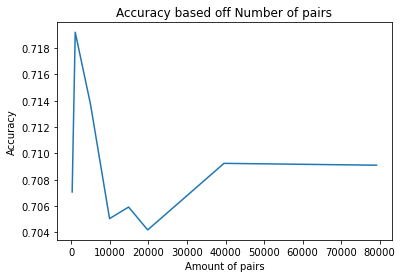

In [51]:
plt.plot(len_test, accuracies)
plt.title('Accuracy based off Number of pairs')
plt.xlabel('Amount of pairs')
plt.ylabel('Accuracy')
plt.show()